In [ ]:
# https://blog.naver.com/PostView.nhn?blogId=garden2040&logNo=221443844433
# 위 블로그를 따라서 mnist 자료를 확인해 본다.
# 2024.06.25 한희정

In [1]:
import tensorflow as tf

C:\ProgramData\anaconda3\envs\test_tensor1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\anaconda3\envs\test_tensor1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\anaconda3\envs\test_tensor1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\anaconda3\envs\test_tensor1\lib\site-

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001EE7DFC3DA0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001EE7DFDBA58>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001EE7DFDB9B0>)

In [4]:
mnist.train
mnist.test
mnist.validation

In [10]:
import os
import struct
import numpy as np

"""
MNist loading helper for Python 2.7.
For Python 3.x, see https://gist.github.com/akesling/42393ccb868125071fdea77d98a0d2f0
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte') # 수정.240625
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte') # 수정.240625
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte') # 수정.240625
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte') # 수정.240625
    else:
        raise ValueError("dataset must be 'testing' or 'training'") # 수정.240625

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)): # 수정.240625
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

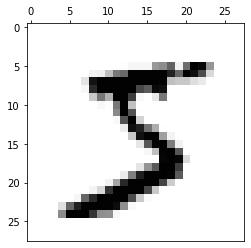

In [11]:
mnist = read("training", path="./mnist_unzip")
image = next(mnist)
show(image[1])
#[출처] 파이썬 MNIST 데이터셋 다운로드 후 살펴보기|작성자 김동현

In [13]:
print(mnist.gi_code)

<code object read at 0x000001EE30E7B810, file "<ipython-input-10-adc392abe3ef>", line 12>
